# Example of accessing raw data at CCIN2P3


- work with Weakly_2021_36
- use jupyter kernel LSST



- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/03/02



In [1]:
! eups list -s | grep local

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits
import sqlite3

In [3]:
def read_sqlite(dbfile):
    import sqlite3
    from pandas import read_sql_query, read_sql_table

    with sqlite3.connect(dbfile) as dbcon:
        tables = list(read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])
        out = {tbl : read_sql_query(f"SELECT * from {tbl}", dbcon) for tbl in tables}

    return out

In [4]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [5]:
FLAG_SAVE_IMAGE=False

In [6]:
!ls /sps/lsst/groups/auxtel/softs/shared/auxteldm

all_visits	       _mapper			run_ingestmasterbias.py~
all_visitsbias	       _mapper~			run_masterbiasing.sh
all_visitsdispersers   processConfig.py		run_masterbiasing.sh~
all_visitsflats        raw			run_masterflatting.sh
biasConfig.py	       README.md		run_processstar.sh
CALIB		       README.md~		run_processstar_v2.sh
flatConfig.py	       ref_cats			run_processstar_v2.sh~
flat.list	       registry.sqlite3		run_processstar_v3.sh
launchflats.sh	       repos			run_processstar_v3.sh~
launchprocessstar.sh   rerun			visit.list
launchprocessstar.sh~  run_ingestmasterbias.py


# Configuration

## Location and date

In [7]:
SOFT_VERSION="v0"

In [8]:
#from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/sps/lsst/groups/auxtel/softs/shared/auxteldm'
registryfile=os.path.join(repoDir,'registry.sqlite3')
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-02-16"
#reporter=NightReporter(repoDir,dayObs)

# Selection

In [9]:
DISPERSER_SEL="holo4_003"

In [10]:
FLAG_BIAS_SELECTION=True

# Information from reporter

In [11]:
#print(reporter.getObservedObjects())

In [12]:
#reporter.makePolarPlotForObjects()

In [13]:
#reporter.plotPerObjectAirMass()

In [14]:
#reporter.printObsTable()

# Information from registry file

In [15]:
dict_db = read_sqlite(registryfile)

In [16]:
dict_db.keys()

dict_keys(['raw', 'sqlite_sequence', 'raw_visit'])

In [17]:
dat = sqlite3.connect(registryfile)

In [18]:
query = dat.execute("SELECT * From raw")

In [19]:
cols = [column[0] for column in query.description]

In [20]:
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [21]:
results

,id,dayObs,seqNum,visit,detector,detectorName,filter,dateObs,date,expTime,object,imageType,wavelength,expGroup,obsid,expId
0,1,2021-06-08,1,2031133798900000,0,S00,RG610~holo4_003,2021-06-08T20:23:00.082,2021-06-08T20:23:00.082,0.0,azel_target,BIAS,-666,2021-06-08T20:22:59.890,AT_O_20210608_000001,2021060800001
1,2,2021-06-08,2,2031134348450000,0,S00,RG610~holo4_003,2021-06-08T20:23:55.021,2021-06-08T20:23:55.021,0.0,azel_target,BIAS,-666,2021-06-08T20:23:54.845,AT_O_20210608_000002,2021060800002
2,3,2021-06-08,3,2031134393460000,0,S00,RG610~holo4_003,2021-06-08T20:23:59.516,2021-06-08T20:23:59.516,0.0,azel_target,BIAS,-666,2021-06-08T20:23:59.346,AT_O_20210608_000003,2021060800003
3,4,2021-06-08,4,2031134438450000,0,S00,RG610~holo4_003,2021-06-08T20:24:04.019,2021-06-08T20:24:04.019,0.0,azel_target,BIAS,-666,2021-06-08T20:24:03.845,AT_O_20210608_000004,2021060800004
4,5,2021-06-08,5,2031134483610000,0,S00,RG610~holo4_003,2021-06-08T20:24:08.527,2021-06-08T20:24:08.527,0.0,azel_target,BIAS,-666,2021-06-08T20:24:08.361,AT_O_20210608_000005,2021060800005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,12756,2022-02-17,765,2251058140450000,0,S00,SDSSg~empty,2022-02-18T09:25:53.560,2022-02-18T09:25:53.560,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:23:34.045,AT_O_20220217_000765,2022021700765
12756,12757,2022-02-17,766,2251059032260000,0,S00,SDSSi~empty,2022-02-18T09:26:52.861,2022-02-18T09:26:52.861,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:25:03.226,AT_O_20220217_000766,2022021700766
12757,12758,2022-02-17,767,2251059032260000,0,S00,SDSSi~empty,2022-02-18T09:27:25.852,2022-02-18T09:27:25.852,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:25:03.226,AT_O_20220217_000767,2022021700767
12758,12759,2022-02-17,768,2251059905630000,0,S00,SDSSr~empty,2022-02-18T09:28:22.143,2022-02-18T09:28:22.143,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:26:30.563,AT_O_20220217_000768,2022021700768


In [22]:
results_sorted = results.sort_values(["dayObs", "seqNum"], ascending=True)

In [23]:
results_sorted

,id,dayObs,seqNum,visit,detector,detectorName,filter,dateObs,date,expTime,object,imageType,wavelength,expGroup,obsid,expId
8687,8688,2021-02-16,1,1934346219930000,0,S00,empty~empty,2021-02-16T19:50:22.184,2021-02-16T19:50:22.184,0.0,azel_target,BIAS,-666,2021-02-16T19:50:21.993,AT_O_20210216_000001,2021021600001
8688,8689,2021-02-16,2,1934362834080000,0,S00,empty~empty,2021-02-16T20:18:03.588,2021-02-16T20:18:03.588,0.0,azel_target,BIAS,-666,2021-02-16T20:18:03.408,AT_O_20210216_000002,2021021600002
8689,8690,2021-02-16,3,1934362963860000,0,S00,empty~empty,2021-02-16T20:18:16.563,2021-02-16T20:18:16.563,0.0,azel_target,BIAS,-666,2021-02-16T20:18:16.386,AT_O_20210216_000003,2021021600003
8690,8691,2021-02-16,4,1934363094110000,0,S00,empty~empty,2021-02-16T20:18:29.581,2021-02-16T20:18:29.581,0.0,azel_target,BIAS,-666,2021-02-16T20:18:29.411,AT_O_20210216_000004,2021021600004
8691,8692,2021-02-16,5,1934363223760000,0,S00,empty~empty,2021-02-16T20:18:42.546,2021-02-16T20:18:42.546,0.0,azel_target,BIAS,-666,2021-02-16T20:18:42.376,AT_O_20210216_000005,2021021600005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,12756,2022-02-17,765,2251058140450000,0,S00,SDSSg~empty,2022-02-18T09:25:53.560,2022-02-18T09:25:53.560,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:23:34.045,AT_O_20220217_000765,2022021700765
12756,12757,2022-02-17,766,2251059032260000,0,S00,SDSSi~empty,2022-02-18T09:26:52.861,2022-02-18T09:26:52.861,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:25:03.226,AT_O_20220217_000766,2022021700766
12757,12758,2022-02-17,767,2251059032260000,0,S00,SDSSi~empty,2022-02-18T09:27:25.852,2022-02-18T09:27:25.852,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:25:03.226,AT_O_20220217_000767,2022021700767
12758,12759,2022-02-17,768,2251059905630000,0,S00,SDSSr~empty,2022-02-18T09:28:22.143,2022-02-18T09:28:22.143,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:26:30.563,AT_O_20220217_000768,2022021700768


In [24]:
list_of_imgtype = results_sorted['imageType'].unique()
list_of_imgtype 

array(['BIAS', 'FLAT', 'SKYEXP', 'ENGTEST', 'DARK'], dtype=object)

In [25]:
list_of_filters = results_sorted['filter'].unique()
list_of_filters

array(['empty~empty', 'RG610~empty', 'RG610~holo4_003', 'empty~holo4_003',
       'empty~ronchi90lpmm', 'RG610~ronchi90lpmm',
       'quadnotch1~ronchi90lpmm', 'BG40~empty', 'BG40~ronchi90lpmm',
       'RG610~ronchi170lpmm', 'BG40~holo4_003', 'unknown~unknown',
       'FELH0600~holo4_003', 'FELH0600~empty', 'FELH0600~ronchi170lpmm',
       'empty~ronchi170lpmm', 'quadnotch1~ronchi170lpmm',
       'BG40~ronchi170lpmm', 'quadnotch1~holo4_003',
       'FELH0600~ronchi90lpmm', 'SDSSg~empty', 'SDSSg~ronchi170lpmm',
       'SDSSg~holo4_003', 'quadnotch1~empty', 'SDSSr~empty',
       'SDSSi~empty', 'SDSSr~holo4_003'], dtype=object)

In [26]:
selected_filters = []
for filt in list_of_filters:
    flag_sel = (filt.find('holo4') != -1) or (filt.find('ronchi90lpmm') != -1) or (filt.find('ronchi170lpmm') != -1)
    if flag_sel:
        selected_filters.append(filt) 
selected_filters = np.array(selected_filters)
selected_filters       

array(['RG610~holo4_003', 'empty~holo4_003', 'empty~ronchi90lpmm',
       'RG610~ronchi90lpmm', 'quadnotch1~ronchi90lpmm',
       'BG40~ronchi90lpmm', 'RG610~ronchi170lpmm', 'BG40~holo4_003',
       'FELH0600~holo4_003', 'FELH0600~ronchi170lpmm',
       'empty~ronchi170lpmm', 'quadnotch1~ronchi170lpmm',
       'BG40~ronchi170lpmm', 'quadnotch1~holo4_003',
       'FELH0600~ronchi90lpmm', 'SDSSg~ronchi170lpmm', 'SDSSg~holo4_003',
       'SDSSr~holo4_003'], dtype='<U24')

In [27]:
def isbias(row):
    #print(row["filter"])
    if str(row["imageType"]) == "BIAS":
        return True
    
    else:
        return False 

In [28]:
def isflat(row):
    #print(row["filter"])
    if str(row["imageType"]) == "FLAT":
        return True
    
    else:
        return False 

In [29]:
def isdisperser(row):
    #print(row["filter"])
    if str(row["filter"]) in selected_filters:
        return True
    
    else:
        return False    

## Select Bias

In [30]:
results_sorted["selected"] = results_sorted.apply(isbias,axis=1)

In [31]:
results_selected = results_sorted[results_sorted["selected"]==1]

In [32]:
list_of_dates_bias = results_selected['dayObs'].unique() 
list_of_dates_bias

array(['2021-02-16', '2021-02-17', '2021-02-18', '2021-03-11',
       '2021-06-08', '2021-06-09', '2021-06-10', '2021-07-06',
       '2021-07-07', '2021-07-08', '2021-09-07', '2021-09-08',
       '2021-09-09', '2021-10-05', '2021-10-06', '2021-10-07',
       '2021-11-02', '2021-11-03', '2021-11-04', '2022-02-15',
       '2022-02-16', '2022-02-17'], dtype=object)

In [33]:
night_sel='2021-02-16'

In [34]:
cut = results_selected['dayObs'] == night_sel 

In [35]:
df = results_selected[cut]

In [36]:
df

,id,dayObs,seqNum,visit,detector,detectorName,filter,dateObs,date,expTime,object,imageType,wavelength,expGroup,obsid,expId,selected
8687,8688,2021-02-16,1,1934346219930000,0,S00,empty~empty,2021-02-16T19:50:22.184,2021-02-16T19:50:22.184,0.0,azel_target,BIAS,-666,2021-02-16T19:50:21.993,AT_O_20210216_000001,2021021600001,True
8688,8689,2021-02-16,2,1934362834080000,0,S00,empty~empty,2021-02-16T20:18:03.588,2021-02-16T20:18:03.588,0.0,azel_target,BIAS,-666,2021-02-16T20:18:03.408,AT_O_20210216_000002,2021021600002,True
8689,8690,2021-02-16,3,1934362963860000,0,S00,empty~empty,2021-02-16T20:18:16.563,2021-02-16T20:18:16.563,0.0,azel_target,BIAS,-666,2021-02-16T20:18:16.386,AT_O_20210216_000003,2021021600003,True
8690,8691,2021-02-16,4,1934363094110000,0,S00,empty~empty,2021-02-16T20:18:29.581,2021-02-16T20:18:29.581,0.0,azel_target,BIAS,-666,2021-02-16T20:18:29.411,AT_O_20210216_000004,2021021600004,True
8691,8692,2021-02-16,5,1934363223760000,0,S00,empty~empty,2021-02-16T20:18:42.546,2021-02-16T20:18:42.546,0.0,azel_target,BIAS,-666,2021-02-16T20:18:42.376,AT_O_20210216_000005,2021021600005,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,8784,2021-02-16,97,1934380764000000,0,S00,empty~empty,2021-02-16T20:47:56.566,2021-02-16T20:47:56.566,0.0,azel_target,BIAS,-666,2021-02-16T20:47:56.400,AT_O_20210216_000097,2021021600097,True
8784,8785,2021-02-16,98,1934380954150000,0,S00,empty~empty,2021-02-16T20:48:15.585,2021-02-16T20:48:15.585,0.0,azel_target,BIAS,-666,2021-02-16T20:48:15.415,AT_O_20210216_000098,2021021600098,True
8785,8786,2021-02-16,99,1934381143870000,0,S00,empty~empty,2021-02-16T20:48:34.559,2021-02-16T20:48:34.559,0.0,azel_target,BIAS,-666,2021-02-16T20:48:34.387,AT_O_20210216_000099,2021021600099,True
8786,8787,2021-02-16,100,1934381333690000,0,S00,empty~empty,2021-02-16T20:48:53.544,2021-02-16T20:48:53.544,0.0,azel_target,BIAS,-666,2021-02-16T20:48:53.369,AT_O_20210216_000100,2021021600100,True


# Butler

## Configuration for Butler

In [37]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

/tmp/ipykernel_10712/1045256464.py:2: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler=dafPersist.Butler(repoDir)
/tmp/ipykernel_10712/1045256464.py:2: FutureWarning: Gen2 Butler has been deprecated (LatissMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler=dafPersist.Butler(repoDir)


CameraMapper INFO: Loading exposure registry from /sps/lsst/groups/auxtel/softs/shared/auxteldm/registry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/groups/auxtel/softs/shared/auxteldm/CALIB/calibRegistry.sqlite3


## Sequence selection

In [38]:
# Flats
all_myseq_bias=range(1,5)

# wide scan
# -----------
#all_myseq_holo=range(234,310)
# narrow scan
#-----------
all_myseq_holo=range(317,365)

if FLAG_BIAS_SELECTION:
    all_myseq=all_myseq_bias
else:
    all_myseq=all_myseq_holo

In [39]:
seqNum=all_myseq[0]

In [40]:
seqNum

1

## Display

In [41]:
#display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_07_07',url=os.environ["FIREFLY_URL"])

In [42]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [43]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

(minimum=(0, 0), maximum=(543, 2047)): (minimum=(0, 0), maximum=(575, 2047))
argDict[boresightAirmass] is None; stripping


CameraMapper WARN: Cannot create SkyWcs using VisitInfo and Detector, using metadata-based SkyWcs: Cannot create SkyWcs from camera geometry: rotator angle defined using RotType=RotType.UNKNOWN instead of SKY.


## meta data

In [44]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "= '        '",
  '---- Date, night and basic image information ----',
  "= '        '",
  '---- Telescope info, location, observer ----',
  "= '        '",
  '---- Pointing info, etc. ----',
  "= '        '",
  '---- TAN Projection ----',
  "= '        '",
  '---- Image-identifying used to build OBS-ID ----',
  "= '        '",
  '---- Test Stand information ----',
  "= '        '",
  '---- Information from Camera (Common block) ----',
  "= '        '",
  '---- Information from Camera ----',
  "= '        '",
  '---- Filter/grating information ----',
  "= '        '",
  '---- Exposure-related information ----',
  "= '        '",
  '---- Weather information ----',
  "= '        '",
  '---- Header information ----',
  "= '        '",
  '---- Checksums ----',
  '---- Information from Camera

## Image

In [45]:
raw_image=raw.image.array

In [46]:
# Must flip for Spectractor reading
flip_image=np.flip(raw_image, 0)

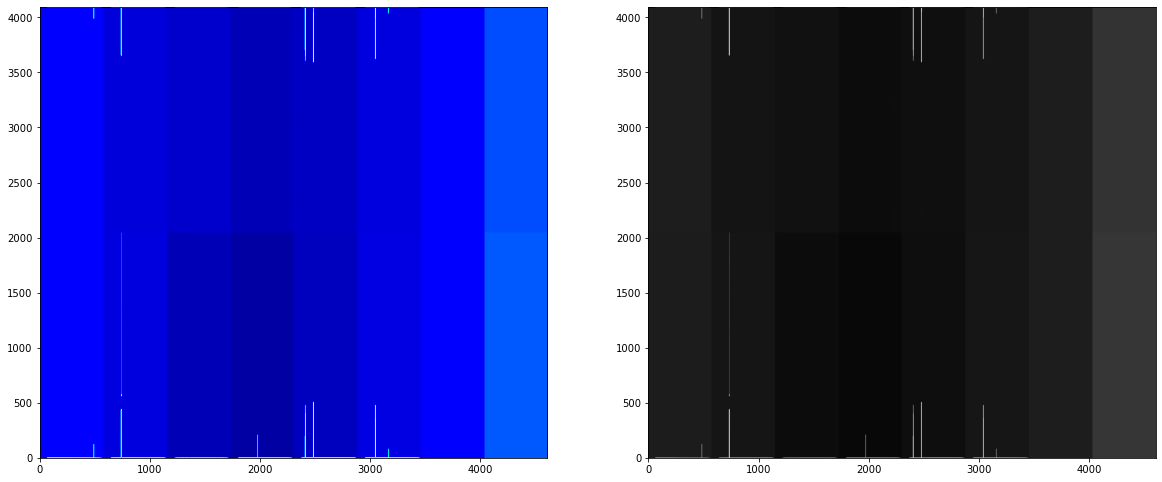

In [47]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax.imshow(flip_image,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(flip_image,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

# Supress overscan

In [48]:
profile_x=raw_image.sum(axis=0)
profile_y=raw_image.sum(axis=1)

In [49]:
diff_profile_x=np.diff(profile_x,prepend=0,append=0)
diff_profile_y=np.diff(profile_y,prepend=0,append=0)

Text(0.5, 0, 'y')

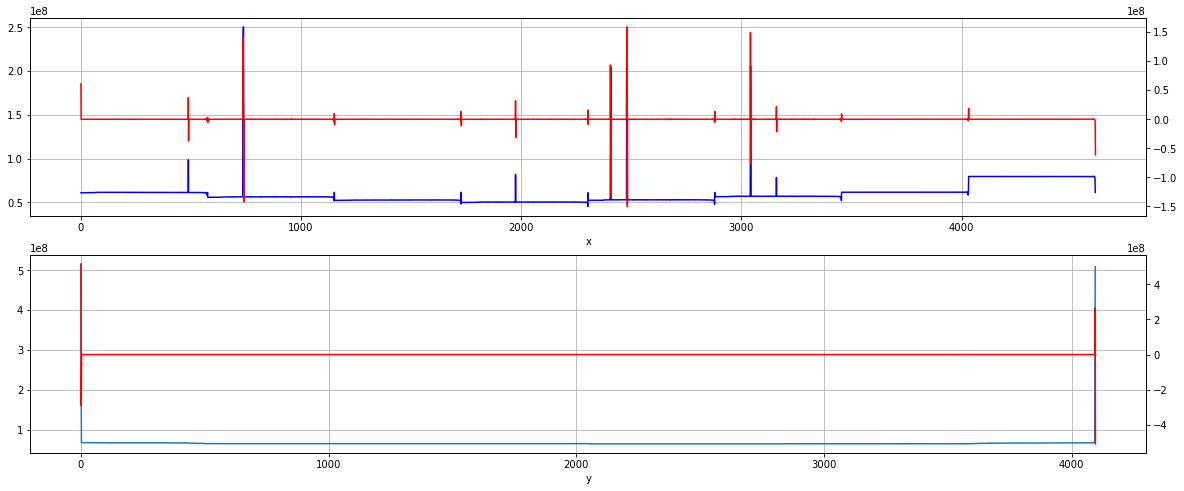

In [50]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(2,1,1)           
ax.plot(profile_x,'b-')
ax.grid()
ax2=ax.twinx()
ax2.plot(diff_profile_x,'r-')

ax.set_xlabel('x')
ax=fig.add_subplot(2,1,2)     
ax.grid()
ax.plot(profile_y)
ax2=ax.twinx()
ax2.plot(diff_profile_y,'r-')
ax.set_xlabel('y')

In [51]:
np.where(diff_profile_x<-2e-8)[0]

array([   2,    5,    7, ..., 4606, 4607, 4608])

In [52]:
np.where(diff_profile_x>2e-8)[0]

array([   0,    1,    3, ..., 4599, 4602, 4604])

In [53]:
np.where(diff_profile_y<-2e-8)[0]

array([   1,    2,    3, ..., 4085, 4091, 4096])

In [54]:
np.where(diff_profile_y>2e-8)[0]

array([   0,   11,   12, ..., 4093, 4094, 4095])

In [55]:
# load indexes generated from flat file
indexes_x_set0=np.loadtxt('data/indexes_x_set0.txt',delimiter=',').astype(int)
indexes_y_set0=np.loadtxt('data/indexes_y_set0.txt',delimiter=',').astype(int)

In [56]:
#indexes_x_set0=np.where(profile_x<1e8)[0]
indexes_x_set0

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,  573,  574,
        575,  576,  577,  578,  579,  580,  581,  582,  583,  584,  585,
        586,  587,  588,  589,  590,  591,  592,  593,  594,  595,  596,
        597,  598,  599,  600,  601,  602,  603,  604,  605,  606,  607,
        608,  609,  610,  611,  612,  613,  614,  615,  616,  617,  618,
        619,  620,  621,  622,  623,  624,  625,  626,  627,  628,  629,
        630,  631,  632,  633,  634,  635,  636,  637,  638,  639, 1149,
       1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160,
       1161, 1162, 1163, 1164, 1165, 1166, 1167, 11

In [57]:
#indexes_y_set0=np.where(profile_y<1e8)[0]
indexes_y_set0

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054,
       2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065,
       2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076,
       2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087,
       2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095])

In [58]:
raw_image[:,indexes_x_set0]=0
raw_image[indexes_y_set0,:]=0

In [59]:
raw_image.max()

182571.0

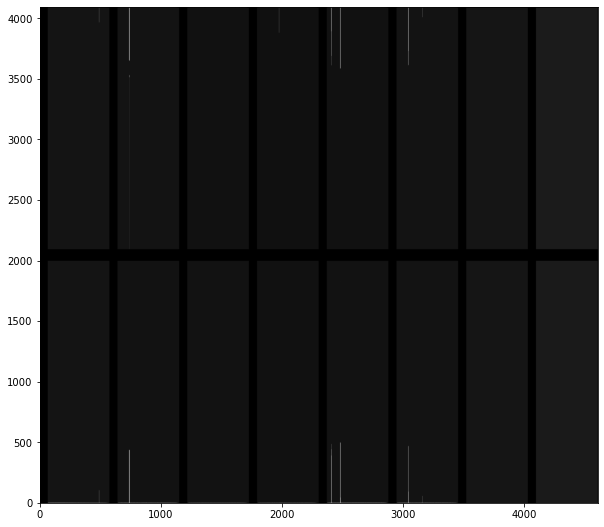

In [60]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

ax.imshow(raw_image,origin='lower',cmap="gray")
plt.show()

In [61]:
data_noemptycolumn = raw_image[:,~np.all(raw_image == 0, axis=0)]

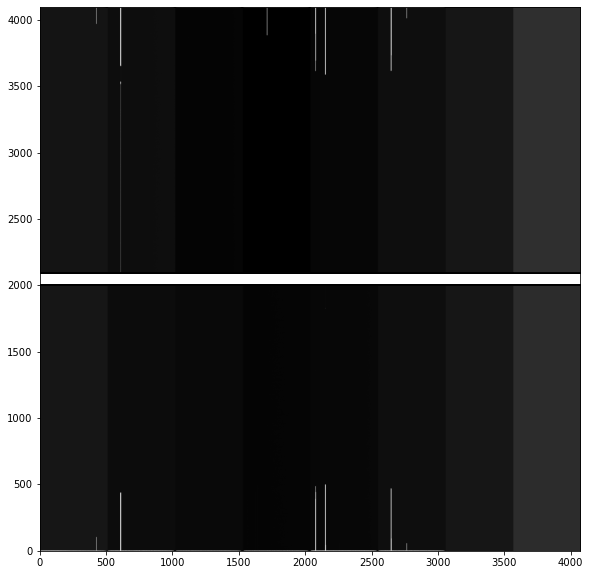

In [62]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
plt.imshow(data_noemptycolumn,origin='lower',cmap="gray",norm=LogNorm())

In [63]:
data_noemptyrow = data_noemptycolumn[~np.all(raw_image == 0, axis=1),:]

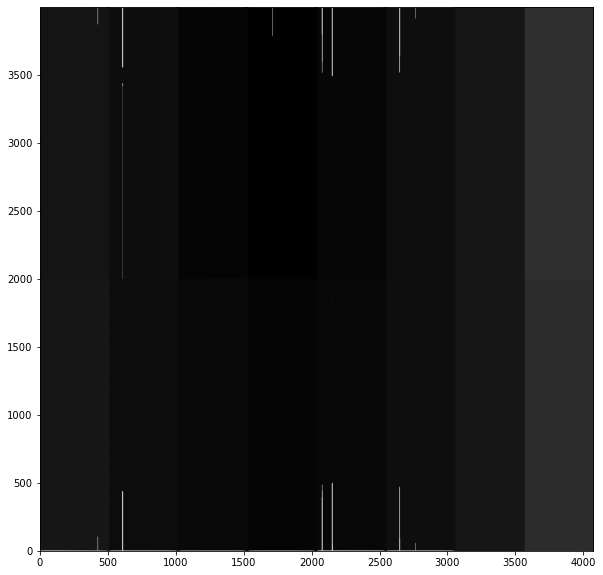

In [64]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
plt.imshow(data_noemptyrow,origin='lower',cmap="gray",norm=LogNorm())
#plt.imshow(data_noemptyrow,origin='lower',cmap="gray")

In [65]:
data=data_noemptyrow

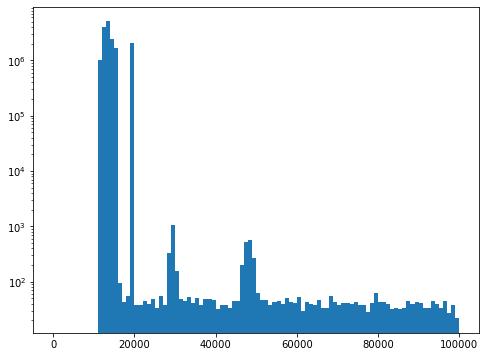

In [66]:
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
flat_array=np.ravel(data)
ax.hist(flat_array,bins=100,range=(0,100000));
ax.set_yscale('log')

In [67]:
data.shape

(4000, 4072)